In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv('music_train.csv')
df

,lyric,class
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1
...,...,...
51049,"I told her pour me some more, then she went ri...",0
51050,Hit the ground and crawl to the dresser,0
51051,Just keep breathin' and breathin' and breathin...,1
51052,"Down go the system, long live the king (King)",0


In [3]:
df.head()

,lyric,class
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1


In [4]:
df.tail()

,lyric,class
51049,"I told her pour me some more, then she went ri...",0
51050,Hit the ground and crawl to the dresser,0
51051,Just keep breathin' and breathin' and breathin...,1
51052,"Down go the system, long live the king (King)",0
51053,If your mother knew all the things we do (From...,1


In [5]:
df.shape

(51054, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51054 entries, 0 to 51053
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyric   51054 non-null  object
 1   class   51054 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 797.8+ KB


In [7]:
df.isnull().sum()

lyric    0
class    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['lyric']=le.fit_transform(df['lyric'])

In [11]:
df

,lyric,class
0,6089,1
1,21784,0
2,21553,0
3,3549,0
4,8693,1
...,...,...
51049,14540,0
51050,10427,0
51051,18408,1
51052,7540,0


<AxesSubplot:xlabel='lyric', ylabel='Count'>

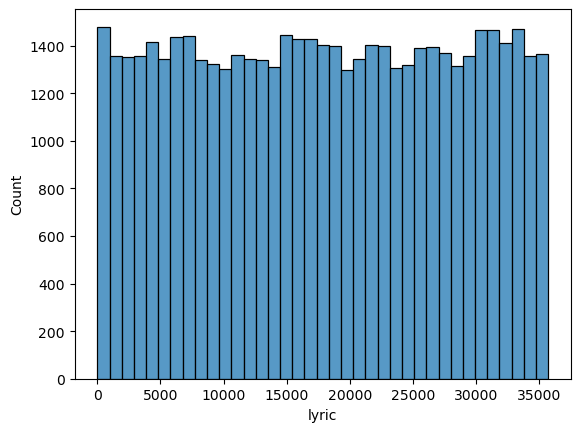

In [12]:
sns.histplot(x='lyric',data=df)

<AxesSubplot:xlabel='class', ylabel='Count'>

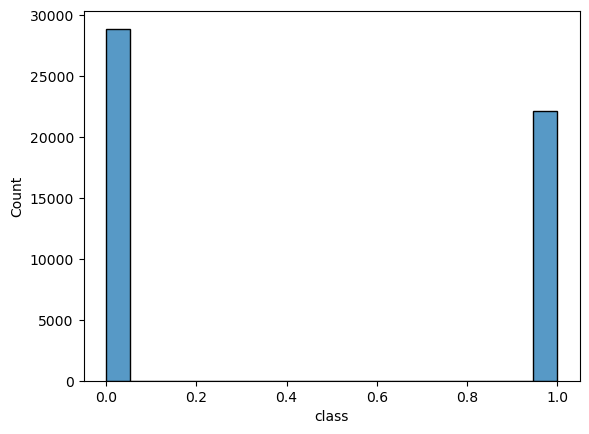

In [13]:
sns.histplot(x='class',data=df)

In [14]:
y=df['class']
y

0        1
1        0
2        0
3        0
4        1
        ..
51049    0
51050    0
51051    1
51052    0
51053    1
Name: class, Length: 51054, dtype: int64

In [15]:
x=df['lyric']
x

0         6089
1        21784
2        21553
3         3549
4         8693
         ...  
51049    14540
51050    10427
51051    18408
51052     7540
51053    17335
Name: lyric, Length: 51054, dtype: int32

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [17]:
x.shape,X_train.shape,X_test.shape

((51054,), (45948,), (5106,))

In [18]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [19]:
forest=RandomForestClassifier()

In [20]:
forest.fit(X_train,y_train)
X_train_pred=forest.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

forest.fit(X_test,y_test)
X_test_pred=forest.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

C:\Users\HP\AppData\Local\Temp\ipykernel_20572\1403624011.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


accuracy score of trained data: 0.9991294506833812


C:\Users\HP\AppData\Local\Temp\ipykernel_20572\1403624011.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_test,y_test)


accuracy score of test data: 1.0


In [21]:
tree=DecisionTreeClassifier()

In [22]:
tree.fit(X_train,y_train)
X_train_pred=tree.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

tree.fit(X_test,y_test)
X_test_pred=tree.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9993470880125359
accuracy score of test data: 1.0


In [23]:
knn=KNeighborsClassifier()

In [24]:
knn.fit(X_train,y_train)
X_train_pred=knn.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

knn.fit(X_test,y_test)
X_test_pred=knn.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy score of trained data: 0.8423870462261687
accuracy score of test data: 0.7522522522522522


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [1]:
input_data=(21784)
input_data_as_np=np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=forest.predict(input_data_reshaped)
prediction

NameError: name 'np' is not defined

In [29]:
if(prediction[0]==1):
    print('Its a pop song')
else:
    print('Its a rap song')

Its a rap song
